## Multi Instrument Plot
This tool downloads and visualizes time-series data of various instruments of a selected spacecraft including solar energetic particle intensities, solar wind plasma and magnetic field data. 

Selected remote-sensing observations such as radio spectrograms or X-ray light curves are also available.

#### Import tools and display options

(note: it's encouraged to first run the notebook with all checkboxes enabled. It's easier to disable unwanted options after loading.)

Energy channel selection: click, hold and drag mouse, or hold Shift and click for range selection, or hold Ctrl/Cmd and click for selecting individual channels.


In [1]:
import os
from multi_inst_plots import multi_inst_plot as m

In [2]:
m.options.show()

#### Data directory

Define where to download files. Running this cell will set it to \<current directory\>/data. Setting to None will use sunpy's default data directory. 

In [3]:
m.options.path = f"{os.getcwd()}{os.sep}data"

#### Define plot range (optional)

You can optionally define a smaller plotting range here. Run this whenever start/end dates are changed

In [ ]:
m.plot_range(m.options.startdate.value, m.options.enddate.value)

#### Load and plot data
Figure and axes are returned for further tweaking capability.

Loading STEREO data for range: 2022-02-15 00:00:00 - 2022-02-17 00:00:00




100%|########################################| 641k/641k [00:00<00:00, 156MB/s]


100%|#############################################| 1.20M/1.20M [00:00<?, ?B/s]


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

sta_l1_het_20220216_v01.cdf:   0%|          | 0.00/215k [00:00<?, ?B/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

sta_l1_mag_rtn_20220216_v06.cdf:   0%|          | 0.00/19.4M [00:00<?, ?B/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

sta_l3_wav_hfr_20220216_v01.cdf:   0%|          | 0.00/14.4M [00:00<?, ?B/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

sta_l3_wav_lfr_20220216_v01.cdf:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

Fetching GOES-17 data for 2022-02-15 00:00:00 - 2022-02-17 00:00:00


Files Downloaded:   0%|          | 0/3 [00:00<?, ?file/s]

sci_xrsf-l2-flx1s_g17_d20220217_v2-2-0.nc:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

Chosen energy channels:
SEPT electrons: (0, 2, 4, 6, 8, 10, 12, 14), 8
HET electrons: (0, 1, 2), 3
SEPT protons: (0, 4, 8, 12, 16, 20, 24, 28), 8
HET protons: (0, 2, 4, 6, 8, 10), 6
Plotting STEREO A data for timerange 2022-02-15 00:00:00 - 2022-02-17 00:00:00


2025-04-23 15:27:11 - sunpy - INFO: Obtained JPL HORIZONS location for STEREO-A (spacecraft) (-234)   


INFO: Obtained JPL HORIZONS location for STEREO-A (spacecraft) (-234)    [sunpy.coordinates.ephemeris]


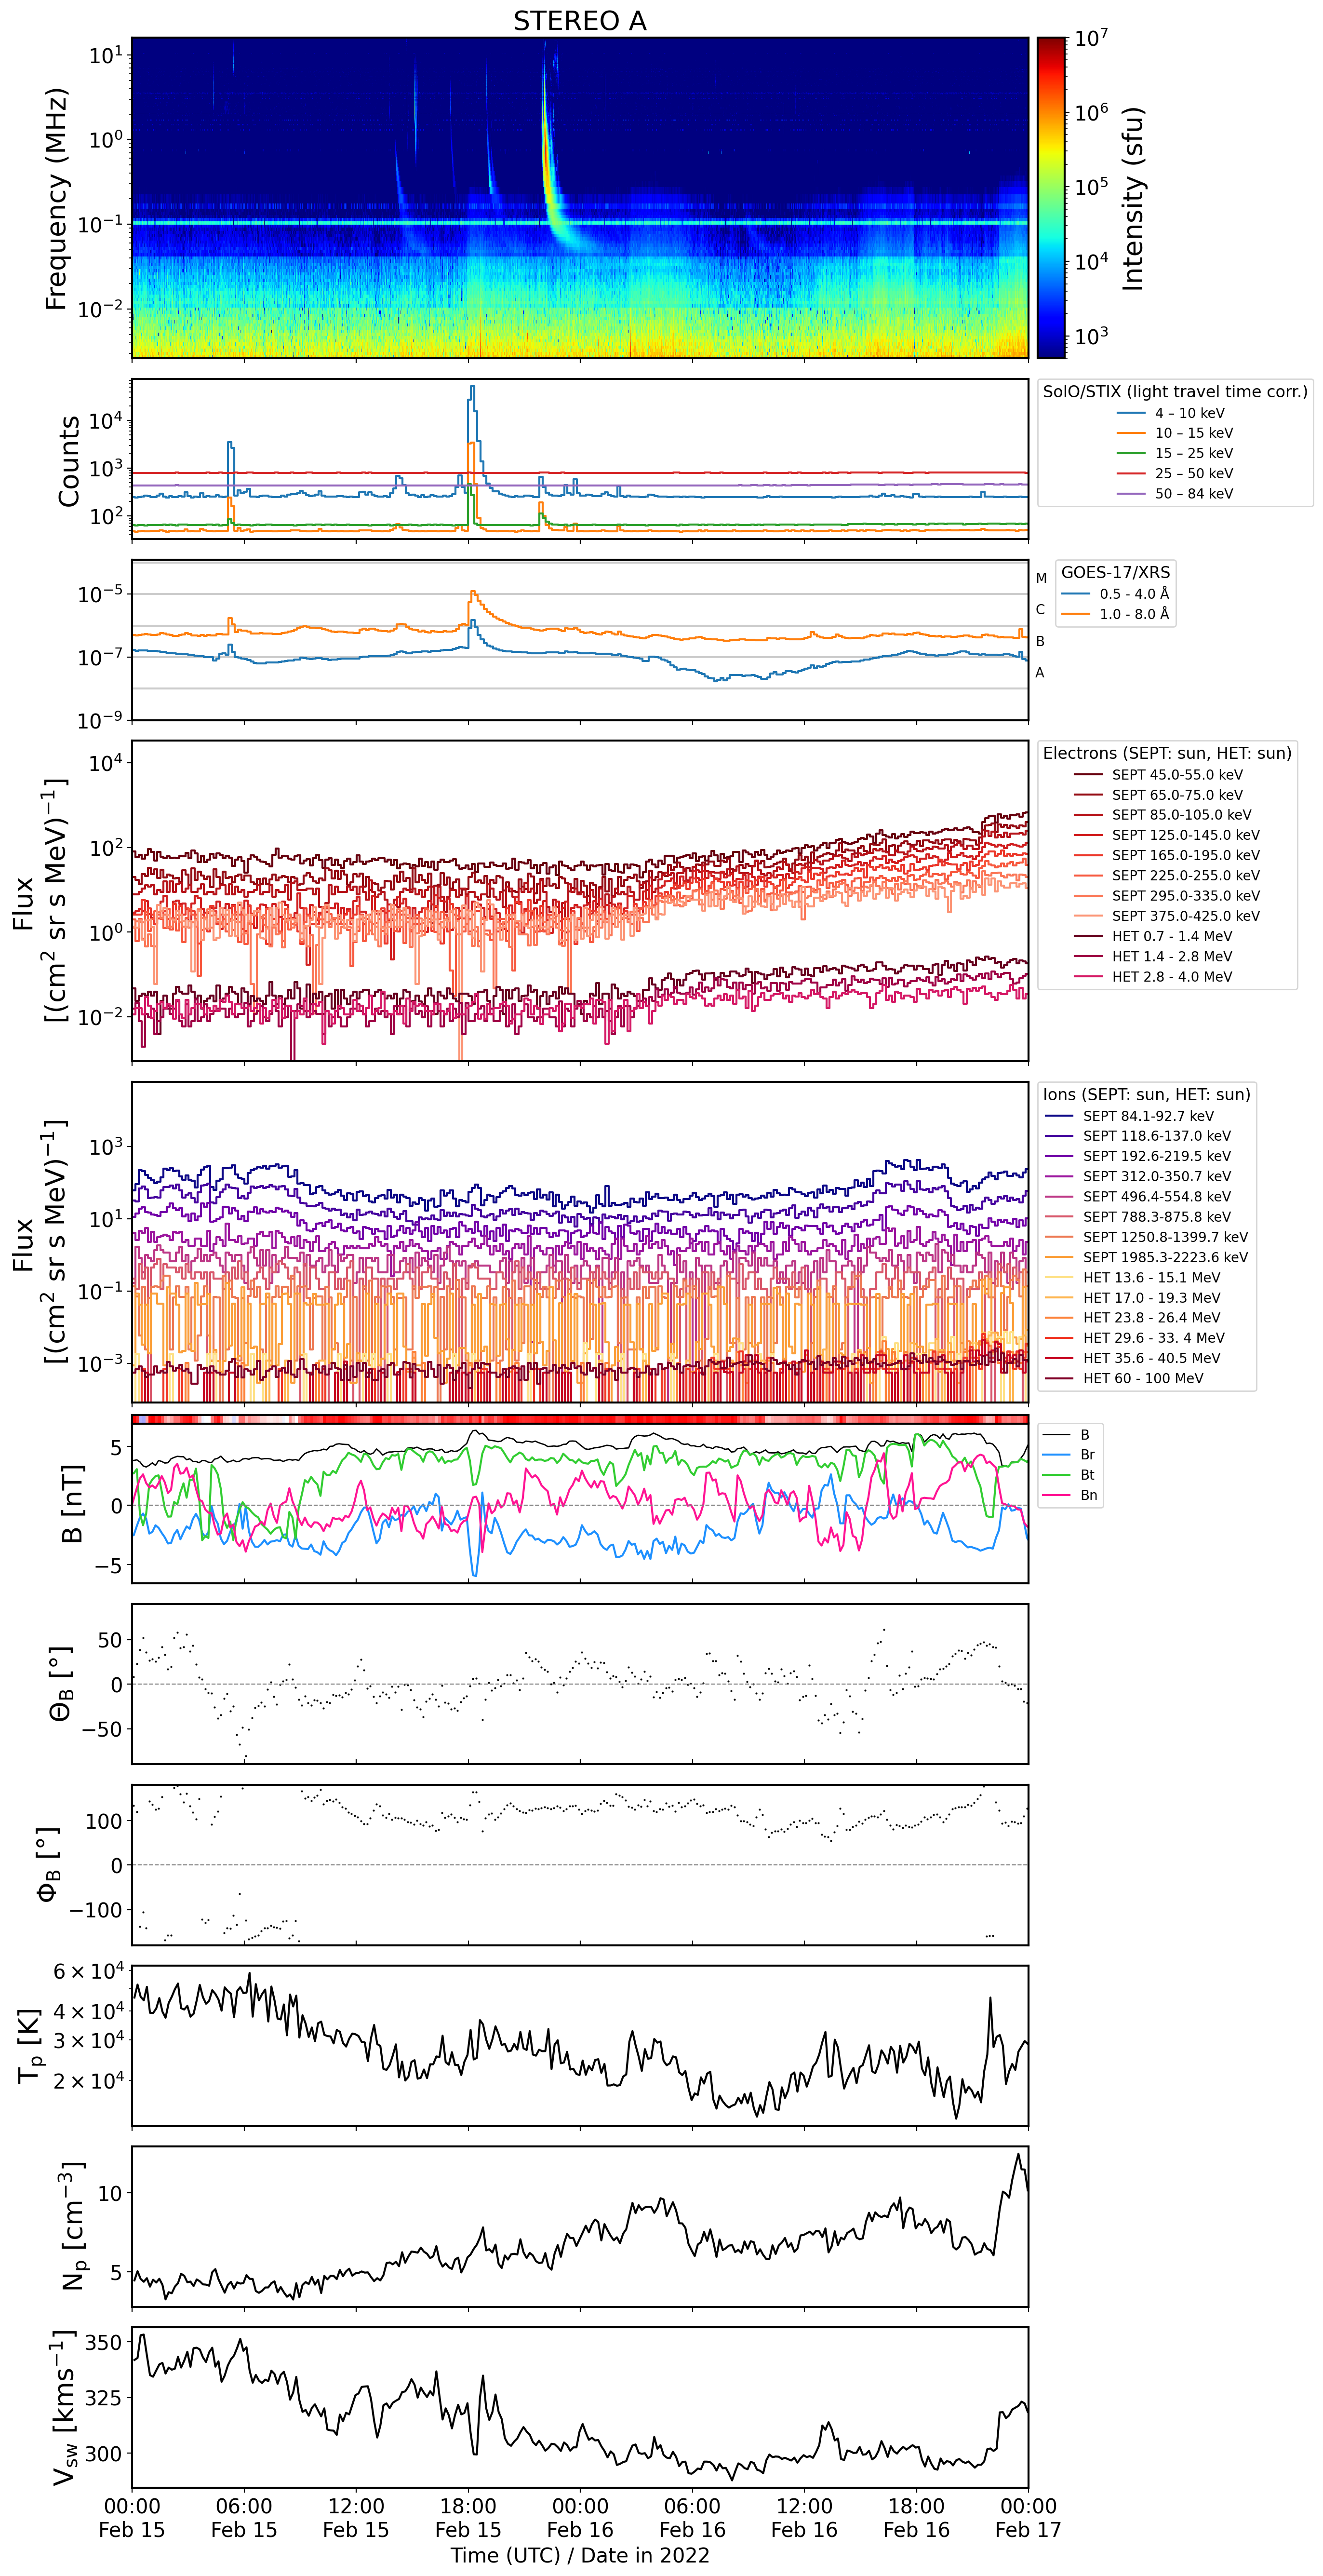

In [11]:
m.load_data()
fig, axs = m.make_plot()

In [6]:
fig.savefig("SEP_multi-instrument_plot.png")